<a href="https://colab.research.google.com/github/urozendo/APRENDIZAGEM-DE-M-QUINA---UFPB/blob/main/Projeto_ML_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div >
<center>
<img src="https://images.educamaisbrasil.com.br/content/superior/instituicao/logo/g/ufpb.png" width="140"/>
<img src="https://www.ufpb.br/de/contents/imagens/logode.png" width="100"/>
</center>
</div>

<h1 align="center">PROJETO APRENDIZAGEM DE MÁQUINA 2020</h1> 




---
**Professor**: 
TELMO DE MENEZES E SILVA FILHO

**Equipe**:
1. HOZANA FRANCIELLE DO NASCIMENTO BORGES (2016038540)
2. KLEBER HENRIQUE DOS SANTOS (2016096042)
3. ULLYSSES DA NOBREGA ROSENDO (2016090129)


---


# Seção 1






### Conjunto de dados e Motivação do Projeto 


<div >
<center>
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" width="140"/>
</div>

O conjunto de dados é referente a tipos de vinho, estão incluídos no conjunto de dados dois tipos de vinho do norte de Portugal e valores físico-químicos dos vinhos, vinho tinto e vinho branco. O conjunto de dados foi obtido do repositório [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 


**Motivação**: O objetivo é classificar o tipo do vinho utilizando modelos de apredizagem de máquina com base em atributos físico-químicos dos vinhos. 

Temos como variável dependente(ou resposta):
* type (tipo do vinho, tinto ou branco)


Temos os seguintes atributos físico-químicos:

* fixed acidity (acidez fixa)
* volatile acidity (acidez volátil)
* citric acid (ácido cítrico)
* açúcar residual (residual sugar)
* chlorides (cloretos)
* free sulfur dioxide (dióxido de enxofre livre)
* total sulfur dioxide (dióxido de enxofre total)
* density (densidade)
* pH
* sulphates (sulfatos)
* alcohol (álcool)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

df_red = pd.read_csv(wine_red, sep = ';')
df_red['type'] = np.repeat(0, df_red.shape[0])
del df_red['quality']

df_white = pd.read_csv(wine_white, sep = ';')
df_white['type'] = np.repeat(1, df_white.shape[0])
del df_white['quality']

df_winequality = pd.concat([df_red, df_white])
df_winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


# Seção 2

## Verificando se existe valores faltantes em alguma coluna do conjunto de dados


In [ ]:
pd.DataFrame(df_winequality.isnull().sum(axis=0)).transpose()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(df_winequality.isna().sum(axis=0)).transpose()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,0,0,0,0,0,0,0,0,0,0,0


O conjunto de dados não possui nenhum dado faltante e nenhum NA

## Verificando a frequência dos tipos de vinho no conjunto de dado

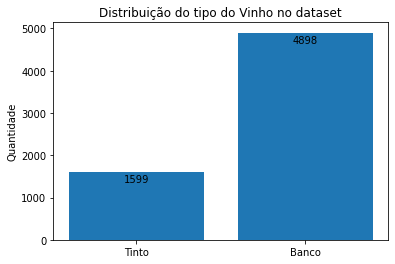

In [ ]:
count_type = df_winequality.groupby("type")["type"].count()
y = list(count_type)
x = [0,1]
plt.bar(x, y)
plt.xticks(x, ('Tinto', 'Banco'))
plt.ylabel('Quantidade')
plt.title('Distribuição do tipo do Vinho no dataset')

for x,y in zip(x,y):
    label = "{}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,-10), ha='center')

plt.show()


É observado que as classes estão desbalanceadas, portanto, será feito o balanceamento das classes. Selecionamos uma amostra aleatória do tamanho da menor classe de vinho, vinha tinto, e escolhemos aleatoriamente na amostra de vinhos do tipo branco. Com isso temos as duas classes balanceadas com 1599 observações em ambas.



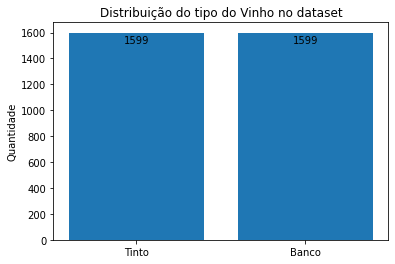

In [ ]:
import random

#Definindo Semente
seed = 10122020
np.random.seed(seed)

random.seed(seed)
index_random = random.sample(range(df_white.shape[0]), df_red.shape[0], )
df_white = df_white.iloc[index_random] 

df_winequality = pd.concat([df_red, df_white])

count_type = df_winequality.groupby("type")["type"].count()
y = list(count_type)
x = [0,1]
plt.bar(x, y)
plt.xticks(x, ('Tinto', 'Banco'))
plt.ylabel('Quantidade')
plt.title('Distribuição do tipo do Vinho no dataset')

for x,y in zip(x,y):
    label = "{}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,-10), ha='center')

plt.show()


## Análise Descritiva das Variáveis

In [ ]:
df_winequality.drop('type', axis = 1).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,7.602611,0.402892,0.303108,4.548812,0.066662,25.482176,92.375704,0.995436,3.245291,0.574834,10.452142
std,1.546280,0.191553,0.164351,4.276409,0.042261,16.715648,59.580372,0.002814,0.165913,0.166151,1.148639
min,4.400000,0.080000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987130,2.720000,0.230000,8.400000
25%,6.600000,0.255000,0.210000,1.900000,0.042000,12.000000,37.000000,0.993485,3.130000,0.470000,9.500000
50%,7.200000,0.360000,0.300000,2.400000,0.059000,23.000000,90.000000,0.995800,3.240000,0.550000,10.200000
75%,8.200000,0.530000,0.400000,6.100000,0.080000,35.000000,136.000000,0.997400,3.360000,0.650000,11.200000
max,15.900000,1.580000,1.000000,31.600000,0.611000,108.000000,344.000000,1.010300,4.010000,2.000000,14.900000


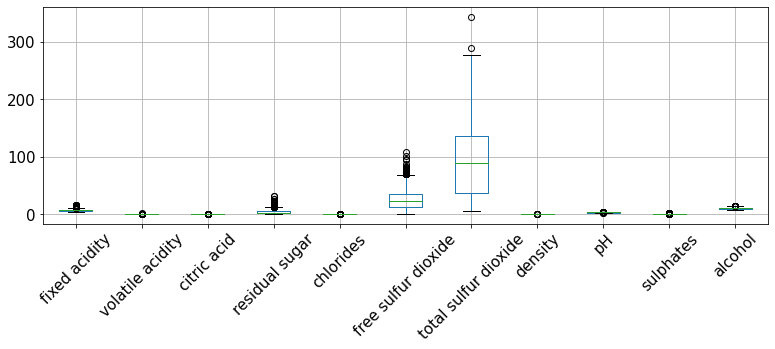

In [ ]:
df_winequality.drop('type', axis=1).boxplot( rot=45, fontsize=15, figsize = (13,4))

Podemos observar a diferença de escala entre os atributos, isto pode afetar diretamente a estimação de parametros do modelo, portanto, o ideal é padronizar as variáveis. A normalização torna os dados mais bem condicionados para convergência dos algoritmos de ML.

In [ ]:
from sklearn import preprocessing

names = df_winequality.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_winequality)
df_winequality = pd.DataFrame(scaled_df, columns=names)
df_winequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.260870,0.413333,0.00,0.038835,0.106845,0.093458,0.082840,0.460509,0.612403,0.186441,0.153846,0.0
1,0.295652,0.533333,0.00,0.061489,0.143573,0.224299,0.180473,0.417350,0.372093,0.254237,0.215385,0.0
2,0.295652,0.453333,0.04,0.051780,0.133556,0.130841,0.142012,0.425982,0.418605,0.237288,0.215385,0.0
3,0.591304,0.133333,0.56,0.038835,0.105175,0.149533,0.159763,0.469141,0.341085,0.197740,0.215385,0.0
4,0.260870,0.413333,0.00,0.038835,0.106845,0.093458,0.082840,0.460509,0.612403,0.186441,0.153846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0.208696,0.140000,0.50,0.407767,0.068447,0.439252,0.556213,0.443246,0.286822,0.124294,0.153846,1.0
3194,0.243478,0.066667,0.31,0.012945,0.055092,0.177570,0.198225,0.231765,0.465116,0.096045,0.369231,1.0
3195,0.208696,0.053333,0.40,0.051780,0.041736,0.158879,0.284024,0.223133,0.596899,0.107345,0.461538,1.0
3196,0.208696,0.093333,0.35,0.543689,0.045075,0.345794,0.434911,0.529564,0.403101,0.107345,0.092308,1.0


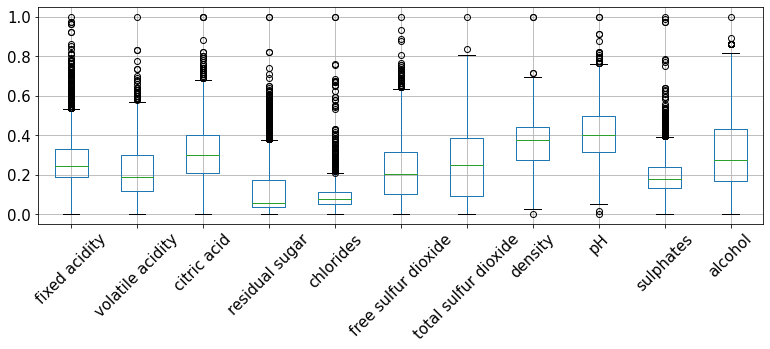

In [ ]:
df_winequality.drop('type', axis=1).boxplot( rot=45, fontsize=15, figsize = (13,4))

## Matriz de Correlação

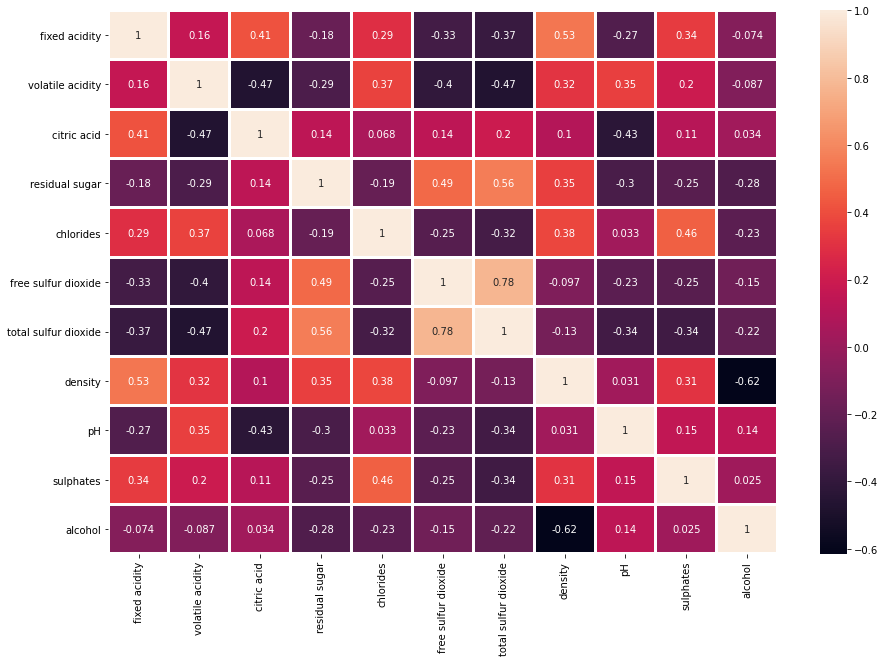

In [ ]:
import seaborn as sns
corr = df_winequality.drop('type', axis = 1).corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, linewidths=2)

A matriz de correlação mostra os valores de correlação de Pearson que medem o grau de relação linear entre cada par atributos. Os valores de correlação podem variar entre -1 e +1. A maior correlação entre as variáveis do conjunto de dado é uma correlação inversa entre alcool e density, correlação de $\rho=0.62$, considerada moderadas mas que não chega a causar multicolinearidade.

# Seção 3

### Modelos Utilizados
* Árvore de Decisão

Árvores de decisão são modelos estatísticos utilizados em problemas de predição supervisionada, onde um conjunto de atributos é utilizado para predizer o valor de um atributo de saída (atributo alvo ou target). Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite que um indivíduo ou organização tenha um suporte a tomada de decisões com base nas condições e probabilidades. Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente.

* SVC

As SVMs são embasadas pela teoria de aprendizado estatístico. Essa teoria estabelece uma série de princípios que devem ser seguidos na  obtenção  de  classificadores  com  boa  generalização,  definidos  como  a  sua capacidade de prever corretamente a classe de novos dados do mesmo domínio em que  o  aprendizado  ocorreu.  Esta  técnica  originalmente  surgiu  para  classificaçãobinária,  busca  a  construção  de  um  hiperplano  como  superfície  de  decisão,  de  tal forma  que  a  separação  entre  exemplos  seja  máxima,  isso  considerando  padrões linearmente separáveis para   padrões   não   linearmente   separáveis,   busca-se   uma   função   de mapeamento  apropriado  para  tornar  o  conjunto  mapeado  linearmente  separável. 

* Regressão Logística

O modelo paramétrico de regressão logística constitui um método de classificação supervisionada e trata-se de um caso particular dos modelos lineares generalizados definido pela distribuição binomial com função de ligação canônica, apropriado para a modelagem de resposta binária ou categórica. A predição na regressão logística é feita a partir da ponderação das variáveis explicativas (X) com base no efeito que cada uma exerce em relação à ocorrência da variável resposta (Y), possibilitando assim que se estime a probabilidade de ocorrência do evento de interesse.

* Random Forest

Um algoritmo que abrange as Árvores de Decisão é a Random Forest. Ele é capaz de executar tarefas de regressão e de classificação, sendo também possível aplicar métodos de redução dimensional, tratar valores faltantes e anômalos. É um aprendizado que combina modelos com determinada robustez para obter um novo de robustez maior. Nesse modelo crescem múltiplas árvores, ao invés do CART, modelo onde cresce uma árvore para regressão e classificação. Cada árvore classifica um objeto baseado em seus atributos, sendo portanto essa a classificação a resposta dada pelo algoritmo.


## Holdout

Consiste basicamente em particionar o conjunto de dados, de forma aleatória em dois subconjuntos mutuamente excludentes: conjunto de treinamento e de teste. Tipicamente, seleciona-se aleatoriamente entre 20% e 30% dos dados para compor o conjunto de teste e os demais é utilizado no conjunto de treinamento. Desejamos construir o classificador utilizando um conjunto de padrões onde as verdadeiras populações são conhecidas e classificar novos padrões sem conhecer o grupo a que pertencem. De forma geral, utilizamos o conjunto de treinamento
para construir a regra de classificação, selecionar parâmetros do modelo, etc e o seu desempenho será avaliado por meio do conjunto de teste.

## Validação Cruzada


A validação cruzada é um método de reamostragem que tem como objetivo avaliar a capacidade de generalização de modelos, normalmente a distribuição entre treino e teste é feita da seguinte forma:

<div >
<center>
<img src="https://miro.medium.com/max/625/1*0_jdEVi6l1Nj-DKK8wJTTQ.png" width="500"  />
</center>
</div>


## Metricas de Validação para Modelos de Classificação



### Preliminares

<div >
<center>
<img src="https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png" width="500"/>
</div>



* TP - Verdadeiros Positivos: classificação correta da classe 1;
* FN - Falsos Negativos (Erro Tipo II): erro em que o modelo previu a classe 0 quando o valor real era classe 1;
* FP - Falsos Positivos (Erro Tipo I): erro em que o modelo previu a classe 1 quando o valor real era classe 0;
* TN - Verdadeiros Negativos: classificação correta da classe 0.


### Acurácia


É basicamente o número de acertos (positivos) divido pelo número total de exemplos. Ela deve ser usada em datasets com a mesma proporção de exemplos para cada classe, e quando as penalidades de acerto e erro para cada classe forem as mesmas.

$$accuracy = \frac{TP + TN}{TP + FN + FP + TN}$$




### Precisão

Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe (positivos verdadeiros), dividido pela soma entre este número, e o número de exemplos classificados nesta classe, mas que pertencem a outras (falsos positivos).

$$precision_{class = k} = \frac{TP_k}{TP_k + FP_k}$$

### Recall
Número de exemplos classificados como pertencentes a uma classe, que realmente são daquela classe, dividido pela quantidade total de exemplos que pertencem a esta classe, mesmo que sejam classificados em outra

$$recall_{class = k} = \frac{TP_k}{TP_k + FN_k}$$

### F1-Score

O F1 Score é uma média harmônica entre precisão e recall.

$$2 * \frac{ Precisão * Recall}{Precisão + Recall}$$

## Separando Conjunto de dados em dados de Treinamento e Teste

In [ ]:
seed = 10122020
np.random.seed(seed)

#Utilizando o train_test_split podemos separar nosso conjunto de dados em dados de teste e treinamento
from sklearn.model_selection import train_test_split

X = df_winequality.drop('type', axis = 1)
y = df_winequality['type']


## Testando Modelos

In [ ]:
#Utilizando o cross_val_score podemos fazer a validação cruzada facilmente
from sklearn.model_selection import cross_val_score
#Utilizando o StratifiedKFold temos que treinar e testar os modelos com os folds contendo a mesma proporção de vinhos em cada classe
from sklearn.model_selection import StratifiedKFold 

#Modelos utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

m1 = DecisionTreeClassifier(max_depth=3)
m2 = SVC()
m3 = LogisticRegression(solver='liblinear')
m4 = RandomForestClassifier(n_estimators=100, random_state=seed)

models = [m1,m2,m3,m4]
name_models = ['Árvore de Decisão', 'SVC', 'Regressão Logística', 'Random Forest']



metrics = ['accuracy', 'precision', 'recall', 'f1']
result_metrics = {}


#Criando Fold-s balanceados
n_folds = 10
cv = StratifiedKFold(n_splits = n_folds, shuffle = True)

#Holdout  70-30% x 10
for seed_cross in range(10):
  X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size = 0.30, stratify = y,  random_state = seed_cross)
  
  count = 0
  for model in models:
    name_model = name_models[count]
    print('Modelo: {} ({})'.format(name_model, seed_cross) )
    np.random.seed(seed)
    
    for metric in metrics:
      
      key_model_metric = '{}_{}'.format(name_model,metric)
      if not key_model_metric in result_metrics.keys():
        result_metrics[key_model_metric] = []

      np.random.seed(seed)
      results = cross_val_score(model, X_train, y_train, cv = cv, scoring = metric )
      result_metrics[key_model_metric].extend(results) 
      
      mean = results.mean()
      dv = results.std()
      print('{:10} média: {:.2f}%  Intervalo: [{:.2f}% ~ {:.2f}%]'.format(metric, mean*100, (mean - 2*dv)*100, (mean + 2*dv)*100))
    
    print('\n\n')
    count += 1

## Resultado de Acurácia, Precisão e Recall para cada modelo em cada k-fold da validação

In [ ]:
df_result = pd.DataFrame(result_metrics)
df_result

,Árvore de Decisão_accuracy,Árvore de Decisão_precision,Árvore de Decisão_recall,Árvore de Decisão_f1,SVC_accuracy,SVC_precision,SVC_recall,SVC_f1,Regressão Logística_accuracy,Regressão Logística_precision,Regressão Logística_recall,Regressão Logística_f1,Random Forest_accuracy,Random Forest_precision,Random Forest_recall,Random Forest_f1
0,0.973214,0.973214,0.973214,0.973214,1.000000,1.000000,1.000000,1.000000,0.991071,0.991071,0.991071,0.991071,1.000000,1.000000,1.000000,1.000000
1,0.959821,0.947826,0.973214,0.960352,1.000000,1.000000,1.000000,1.000000,0.982143,0.973684,0.991071,0.982301,0.995536,0.991150,1.000000,0.995556
2,0.946429,0.946429,0.946429,0.946429,0.995536,1.000000,0.991071,0.995516,0.986607,1.000000,0.973214,0.986425,0.995536,1.000000,0.991071,0.995516
3,0.982143,0.990909,0.973214,0.981982,0.995536,1.000000,0.991071,0.995516,1.000000,1.000000,1.000000,1.000000,0.995536,1.000000,0.991071,0.995516
4,0.950893,0.946903,0.955357,0.951111,0.977679,0.965217,0.991071,0.977974,0.977679,0.965217,0.991071,0.977974,0.991071,0.982456,1.000000,0.991150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.964286,0.956140,0.973214,0.964602,0.991071,0.991071,0.991071,0.991071,0.991071,0.982456,1.000000,0.991150,0.995536,0.991150,1.000000,0.995556
96,0.982143,0.965517,1.000000,0.982456,0.995536,0.991150,1.000000,0.995556,0.995536,0.991150,1.000000,0.995556,1.000000,1.000000,1.000000,1.000000
97,0.946429,0.946429,0.946429,0.946429,0.982143,0.990909,0.973214,0.981982,0.964286,0.972727,0.955357,0.963964,0.982143,0.982143,0.982143,0.982143
98,0.977578,0.965217,0.991071,0.977974,0.986547,0.982301,0.991071,0.986667,0.982063,0.982143,0.982143,0.982143,0.991031,0.982456,1.000000,0.991150


## Analisando Resultados dos Modelos

### Acurácia

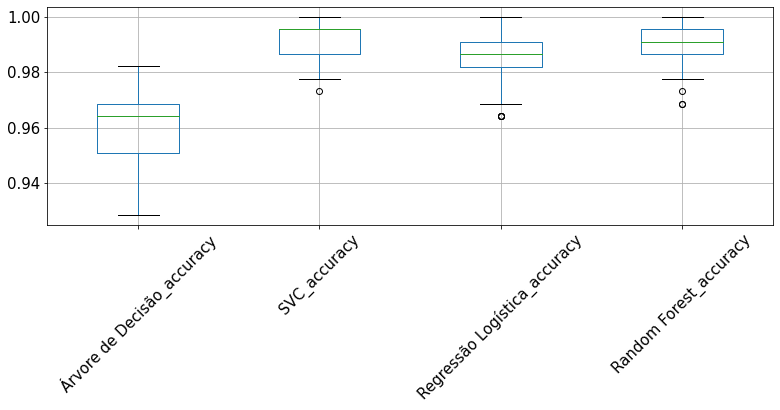

In [ ]:
df_result.filter(like='accuracy').boxplot( rot=45, fontsize=15, figsize = (13,4))

 A acurácia é simplesmente a divisão entre todos os acertos pelo total. Podemos ver pelos boxplot que por esta métrica os melhores modelos foram SVC e Random Forest, com o SVC apresentando um mediana maior que o Random Forest

### Precisão

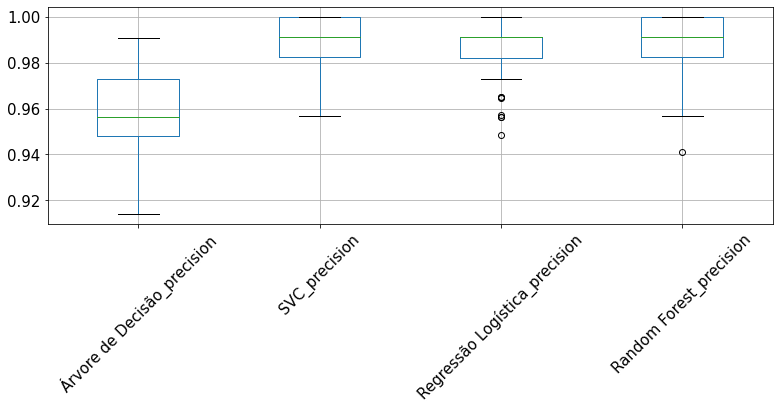

In [ ]:
df_result.filter(like='precision').boxplot( rot=45, fontsize=15, figsize = (13,4))

Precisão de um modelo de Machine Learning é utilizada para indicar a relação entre as previsões positivas realizadas corretamente e todas as previsões positivas (incluindo as falsas). A principal utilização dessa métrica é para modelos onde é preciso minimizar os falsos positivos. Podemos observar um empate entre SVC e Random Forest

### Recall

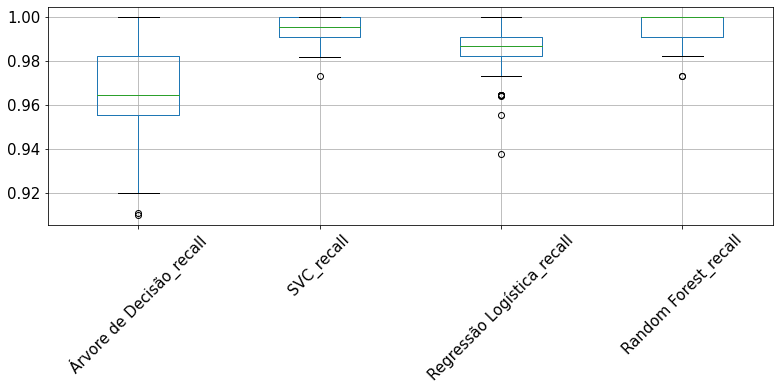

In [ ]:
df_result.filter(like='recall').boxplot( rot=45, fontsize=15, figsize = (13,4))

A medida de recall de um modelo de Machine Learning é definido como a proporção de previsões corretas da categoria alvo, Verdadeiros Positivos em relação a soma dos verdadeiros positivos com os Falsos Negativos. Falsos negativos são os casos da categoria alvo que o modelo previu como se fosse da categoria 0. Podemos observar um empate entre SVC e Random Forest, com a mediana do Random Forest sendo maior que a mediana do SVC

### F1-Score

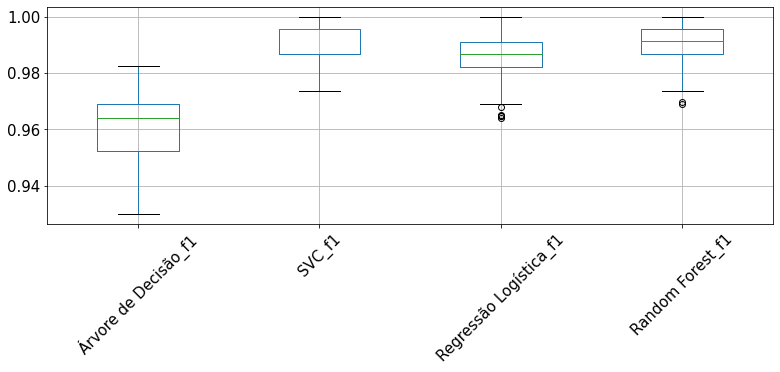

In [ ]:
df_result.filter(like='f1').boxplot( rot=45, fontsize=15, figsize = (13,4))

o F1 Score é a média harmonica entre precisão e recall, é uma métrica melhor que a Acurácia, principalmente em casos onde falsos positivos e falsos negativos possuem impactos diferentes para o modelo. Podemos observar que o modelo SVC e Random Forest empataram mas o SVC apresentou maior mediana. 

#Seção 4

## Melhor Modelo

O modelo escolhido foi o SVC, vamos agora análisa-lo no conjunto de teste e verificar como se comportam as métricas

In [ ]:
index_model = 1
model_final = models[index_model].fit(X_train, y_train)
y_pred = model_final.predict(X_test)
y_scores = model_final.predict_proba(X_test)
y_scores = y_scores[:,1]
print('O melhor modelo foi o: {}'.format(name_models[index_model]) ) 

O melhor modelo foi o: SVC


## Relatório de Metricas de Classificação do Modelo Melhor Modelo


In [ ]:
from sklearn.metrics import classification_report

print('Relatório de Metricas de Classificação:\n', classification_report(y_test, y_pred, digits=4))

Relatório de Metricas de Classificação:
               precision    recall  f1-score   support

         0.0     0.9958    0.9917    0.9937       480
         1.0     0.9917    0.9958    0.9938       480

    accuracy                         0.9938       960
   macro avg     0.9938    0.9938    0.9937       960
weighted avg     0.9938    0.9938    0.9937       960



## Matriz de Confusão do Melhor Modelo


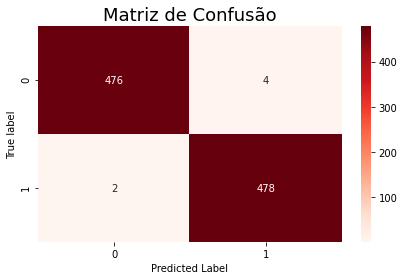

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

np.random.seed(seed)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

## Curva ROC

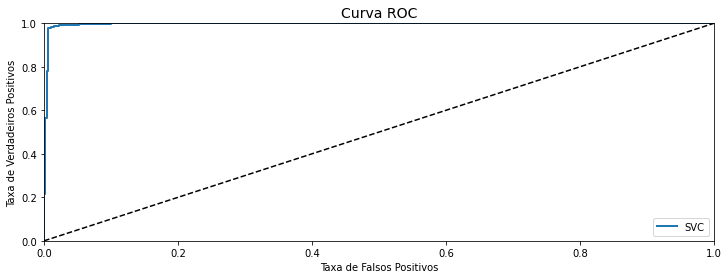

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

fig, ax = plt.subplots(figsize = (12,4))
plt.plot(fpr, tpr, linewidth=2, label = name_models[index_model])
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()


## Área sob a curva ROC


In [ ]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(y_test, y_scores)))

Área sob a curva ROC: 0.9965


A area sob a Curva Roc resume-a como um todo, o que pode ser inadequado, ou seja um teste ideal é aquele cuja área sob a curva ROC é igual a 1. E, fazendo a análise é perceptivel observar que a área sob a Curva Roc é de 0.9994 e está bem proxima de um. 








# Conclusão 


Em problemas de classificação, se faz necessário ter métricas que venha avaliar os modelos estudados. E, nesse trabalho foi avaliado a acuracia, recall, precisão e o metodo do f1-score onde a acurácia indica a perfomace geral do modelo, ou seja o quanto o modelo classificou corretamente os dados. Recall faz a escolha dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas. Precisão faz a escolha dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas. E por fim, o método de avaliação F1-Score é a média harmônica entre precisão e recall. 
Em conclusão, temos que cada métrica tem suas peculiaridades que devem ser levadas em consideração na escolha de como o modelo de classificação será avaliado. No contexto desse projeto, é perceptivel que o modelo que classifica mais assertivamente os tipos de vinhos é SVC. 

# Referências

https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/

https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b

https://imasters.com.br/desenvolvimento/machine-learning-metricas-para-modelos-de-classificacao

https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108